In [1]:
#!pip install pandas

# Cargar  librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Manupulación de las series de tiempo

Una guía completa de muchas de las funcionalidades de Pandas para el manejo de series de tiempo: https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries

#### Primero arreglar un poco el dataframe

In [3]:
df_oro = pd.read_csv("./Datos_historicos_Futuros_oro.csv")
df_oro

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,28.09.2023,"1.883,55","1.895,00","1.896,75","1.874,55",NaN,"-0,39%"
1,27.09.2023,"1.890,90","1.918,80","1.921,70","1.890,30","238,53K","-1,51%"
2,26.09.2023,"1.919,80","1.935,10","1.935,50","1.917,20","212,26K","-0,87%"
3,25.09.2023,"1.936,60","1.944,70","1.946,80","1.933,80","164,26K","-0,46%"
4,22.09.2023,"1.945,60","1.939,60","1.949,10","1.939,60","139,93K","0,31%"
...,...,...,...,...,...,...,...
262,03.10.2022,"1.702,00","1.670,50","1.710,40","1.666,50","215,49K","1,79%"
263,30.09.2022,"1.672,00","1.669,50","1.684,40","1.667,50","179,99K","0,20%"
264,29.09.2022,"1.668,60","1.669,00","1.673,10","1.649,30","201,96K","-0,08%"
265,28.09.2022,"1.670,00","1.636,50","1.671,60","1.622,20","279,82K","2,07%"


In [4]:
#Arreglar las columnas
cols = ["Fecha", "Ultimo", "Apertura", "Maximo", "Minimo", "Vol", "Var"]
df_oro = df_oro.rename(
                    columns={key:value for key,value in zip(df_oro.columns, cols)}
                      )
df_oro

,Fecha,Ultimo,Apertura,Maximo,Minimo,Vol,Var
0,28.09.2023,"1.883,55","1.895,00","1.896,75","1.874,55",NaN,"-0,39%"
1,27.09.2023,"1.890,90","1.918,80","1.921,70","1.890,30","238,53K","-1,51%"
2,26.09.2023,"1.919,80","1.935,10","1.935,50","1.917,20","212,26K","-0,87%"
3,25.09.2023,"1.936,60","1.944,70","1.946,80","1.933,80","164,26K","-0,46%"
4,22.09.2023,"1.945,60","1.939,60","1.949,10","1.939,60","139,93K","0,31%"
...,...,...,...,...,...,...,...
262,03.10.2022,"1.702,00","1.670,50","1.710,40","1.666,50","215,49K","1,79%"
263,30.09.2022,"1.672,00","1.669,50","1.684,40","1.667,50","179,99K","0,20%"
264,29.09.2022,"1.668,60","1.669,00","1.673,10","1.649,30","201,96K","-0,08%"
265,28.09.2022,"1.670,00","1.636,50","1.671,60","1.622,20","279,82K","2,07%"


In [5]:
# Arreglando los tipos numéricos:
# 1. Se cambian los porcentajes y las k 

# Función para cambiar comas por puntos
to_dot = lambda x: "." if x.group(0)=="," else ""

df_oro["Vol"] = df_oro["Vol"].str.replace("K", "")
df_oro["Var"] = df_oro["Var"].str.replace("%", "")

for col in df_oro.columns.values[1:]:
    df_oro[col] = pd.to_numeric(df_oro[col].str.replace(",|\.", to_dot, regex=True))

df_oro

,Fecha,Ultimo,Apertura,Maximo,Minimo,Vol,Var
0,28.09.2023,1883.55,1895.0,1896.75,1874.55,NaN,-0.39
1,27.09.2023,1890.90,1918.8,1921.70,1890.30,238.53,-1.51
2,26.09.2023,1919.80,1935.1,1935.50,1917.20,212.26,-0.87
3,25.09.2023,1936.60,1944.7,1946.80,1933.80,164.26,-0.46
4,22.09.2023,1945.60,1939.6,1949.10,1939.60,139.93,0.31
...,...,...,...,...,...,...,...
262,03.10.2022,1702.00,1670.5,1710.40,1666.50,215.49,1.79
263,30.09.2022,1672.00,1669.5,1684.40,1667.50,179.99,0.20
264,29.09.2022,1668.60,1669.0,1673.10,1649.30,201.96,-0.08
265,28.09.2022,1670.00,1636.5,1671.60,1622.20,279.82,2.07


In [6]:
# Arreglar la fecha
df_oro["Fecha"] = pd.to_datetime(df_oro["Fecha"], format="%d.%m.%Y")

#### Pandas para series de tiempo

Para poder manipular un DataFrame como una serie de tiempo es importante que el índice de este tenga formato de fecha. Pandas ofrece muchas opciones para realizar operaciones con objetos asociados al tiempo. A continuación algunos.

In [7]:
# Fecha como índice
df_oro = df_oro.set_index("Fecha")
df_oro

,Ultimo,Apertura,Maximo,Minimo,Vol,Var
Fecha,,,,,,
2023-09-28,1883.55,1895.0,1896.75,1874.55,NaN,-0.39
2023-09-27,1890.90,1918.8,1921.70,1890.30,238.53,-1.51
2023-09-26,1919.80,1935.1,1935.50,1917.20,212.26,-0.87
2023-09-25,1936.60,1944.7,1946.80,1933.80,164.26,-0.46
2023-09-22,1945.60,1939.6,1949.10,1939.60,139.93,0.31
...,...,...,...,...,...,...
2022-10-03,1702.00,1670.5,1710.40,1666.50,215.49,1.79
2022-09-30,1672.00,1669.5,1684.40,1667.50,179.99,0.20
2022-09-29,1668.60,1669.0,1673.10,1649.30,201.96,-0.08


In [8]:
# Valores para enero del 2023
df_oro.loc["2023/04"]

,Ultimo,Apertura,Maximo,Minimo,Vol,Var
Fecha,,,,,,
2023-04-28,1999.1,1997.2,2004.1,1984.4,172.45,0.01
2023-04-27,1999.0,1999.8,2013.3,1982.0,203.90,0.61
2023-04-26,1986.9,2000.0,2009.8,1986.6,0.62,-0.41
2023-04-25,1995.1,1995.4,2005.0,1979.3,0.85,0.23
2023-04-24,1990.6,1983.2,1991.0,1975.3,0.54,0.47
2023-04-21,1981.3,2005.1,2007.0,1973.0,0.62,-1.42
2023-04-20,2009.8,1996.5,2014.5,1994.2,0.42,0.59
2023-04-19,1998.0,2008.5,2009.7,1971.9,0.92,-0.61
2023-04-18,2010.3,1997.1,2013.4,1994.5,0.22,0.81


In [9]:
# promedios para enero de 2023
df_oro.loc["2023/01"].mean()

Ultimo      1902.486957
Apertura    1900.082609
Maximo      1912.830435
Minimo      1889.110870
Vol          134.733333
Var            0.241739
dtype: float64

#### resample()
Para ir un poco más allá y tener información por periodos de tiempo definidos se puede utilizar el método resample().

In [10]:
# Promedios semanales
#df_oro.resample("w").mean()

# Promedios mensuales
#df_oro.resample("m").mean()

# Promedios cada quince días
#df_oro.resample("15d").mean()

# Promedios cada dos semanas
#df_oro.resample("2w").mean()

# Promedios para los días de semana (lunes-viernes)
#df_oro.resample("B").mean()

# Usando la clase del offset (indica incrementos de tiempo)
df_oro.resample(pd.offsets.Day(50)).mean()

,Ultimo,Apertura,Maximo,Minimo,Vol,Var
Fecha,,,,,,
2022-09-27,1682.458333,1677.755556,1694.527778,1665.625000,203.069167,0.240000
2022-11-16,1794.530556,1793.537500,1806.565278,1783.962500,153.787059,0.129722
2023-01-05,1886.393421,1888.363158,1898.407895,1876.357895,75.350286,-0.055263
2023-02-24,1937.134286,1933.751429,1951.505714,1920.717143,104.220286,0.281714
2023-04-15,1995.412500,1997.069444,2007.575000,1984.262500,110.973529,-0.041944
2023-06-04,1949.681944,1949.148611,1959.172222,1939.211111,140.588788,-0.002222
2023-07-24,1956.859459,1958.070270,1966.510811,1949.601351,129.651143,-0.024324
2023-09-12,1933.603846,1937.169231,1942.950000,1926.296154,182.958333,-0.252308


#### rolling()
Pandas también permite el cálculo de medias móviles usando el método rolling().

In [11]:
df_oro

,Ultimo,Apertura,Maximo,Minimo,Vol,Var
Fecha,,,,,,
2023-09-28,1883.55,1895.0,1896.75,1874.55,NaN,-0.39
2023-09-27,1890.90,1918.8,1921.70,1890.30,238.53,-1.51
2023-09-26,1919.80,1935.1,1935.50,1917.20,212.26,-0.87
2023-09-25,1936.60,1944.7,1946.80,1933.80,164.26,-0.46
2023-09-22,1945.60,1939.6,1949.10,1939.60,139.93,0.31
...,...,...,...,...,...,...
2022-10-03,1702.00,1670.5,1710.40,1666.50,215.49,1.79
2022-09-30,1672.00,1669.5,1684.40,1667.50,179.99,0.20
2022-09-29,1668.60,1669.0,1673.10,1649.30,201.96,-0.08


In [12]:
df_oro.rolling(3, min_periods=1).mean()

,Ultimo,Apertura,Maximo,Minimo,Vol,Var
Fecha,,,,,,
2023-09-28,1883.550000,1895.000000,1896.750000,1874.550000,NaN,-0.390000
2023-09-27,1887.225000,1906.900000,1909.225000,1882.425000,238.530000,-0.950000
2023-09-26,1898.083333,1916.300000,1917.983333,1894.016667,225.395000,-0.923333
2023-09-25,1915.766667,1932.866667,1934.666667,1913.766667,205.016667,-0.946667
2023-09-22,1934.000000,1939.800000,1943.800000,1930.200000,172.150000,-0.340000
...,...,...,...,...,...,...
2022-10-03,1717.766667,1704.433333,1728.566667,1693.100000,197.930000,0.966667
2022-09-30,1701.500000,1682.800000,1711.166667,1679.333333,200.186667,1.220000
2022-09-29,1680.866667,1669.666667,1689.300000,1661.100000,199.146667,0.636667


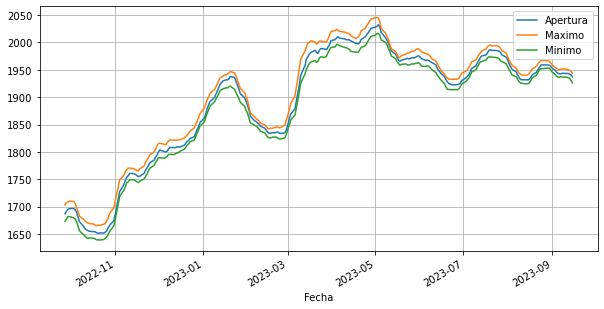

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
df_oro.loc[:,"Apertura":"Minimo"].rolling(10).mean().plot(ax=ax)
ax.grid()

#### Otras operaciones

In [14]:
# Crear una columna con los días
df_oro.index.day

Index([28, 27, 26, 25, 22, 21, 20, 19, 18, 15,
       ...
       10,  7,  6,  5,  4,  3, 30, 29, 28, 27],
      dtype='int32', name='Fecha', length=267)

In [15]:
# Crear una columna con los nombres del día de la observación
# ! locale -a
pd.DataFrame(df_oro.index.day_name("es_CO.utf8"), index=df_oro.index)

,Fecha
Fecha,
2023-09-28,Jueves
2023-09-27,Miércoles
2023-09-26,Martes
2023-09-25,Lunes
2023-09-22,Viernes
...,...
2022-10-03,Lunes
2022-09-30,Viernes
2022-09-29,Jueves


In [16]:
#Sumar diferentes intervalos de tiempo.
pd.DataFrame(df_oro.index + pd.Timedelta(days=1, hours=5, minutes=34, seconds=345))

,Fecha
0,2023-09-29 05:39:45
1,2023-09-28 05:39:45
2,2023-09-27 05:39:45
3,2023-09-26 05:39:45
4,2023-09-23 05:39:45
...,...
262,2022-10-04 05:39:45
263,2022-10-01 05:39:45
264,2022-09-30 05:39:45
265,2022-09-29 05:39:45


In [17]:
# Sumar días de semana (bussiness days)
pd.DataFrame(df_oro.index + pd.offsets.BDay())

,Fecha
0,2023-09-29
1,2023-09-28
2,2023-09-27
3,2023-09-26
4,2023-09-25
...,...
262,2022-10-04
263,2022-10-03
264,2022-09-30
265,2022-09-29


In [18]:
# Se puede dar formato a la fecha
df_oro.index.strftime("%Y-%-b-%d")
#df_oro.index.strftime("%d/%-b/%Y")

Index(['2023-Sep-28', '2023-Sep-27', '2023-Sep-26', '2023-Sep-25',
       '2023-Sep-22', '2023-Sep-21', '2023-Sep-20', '2023-Sep-19',
       '2023-Sep-18', '2023-Sep-15',
       ...
       '2022-Oct-10', '2022-Oct-07', '2022-Oct-06', '2022-Oct-05',
       '2022-Oct-04', '2022-Oct-03', '2022-Sep-30', '2022-Sep-29',
       '2022-Sep-28', '2022-Sep-27'],
      dtype='object', name='Fecha', length=267)

#### Timestamp,  Period -  Timedelta, DateOffsets

Pandas maneja 4 tipos de datos asociados con tiempo.

In [3]:
a = pd.Timestamp("2023/09/29")
b = pd.Period("2023/09/29")
c = pd.Timedelta(1, "d")
d = pd.offsets.Day(1)

In [4]:
a

Timestamp('2023-09-29 00:00:00')

In [5]:
b

Period('2023-09-29', 'D')

In [6]:
c

Timedelta('1 days 00:00:00')

In [7]:
d

<Day>

In [8]:
a + c

Timestamp('2023-09-30 00:00:00')

In [9]:
b + c

Period('2023-09-30', 'D')

In [10]:
a + d

Timestamp('2023-09-30 00:00:00')

In [11]:
# Error debido a la incompatibilidad de las frecuencias
b + d

Period('2023-09-30', 'D')

In [12]:
b.start_time, b.end_time

(Timestamp('2023-09-29 00:00:00'), Timestamp('2023-09-29 23:59:59.999999999'))

In [29]:
# Error, timestamp son instantes
#a.start_time, a.end_time

In [14]:
type(a - pd.Timestamp.today())

pandas._libs.tslibs.timedeltas.Timedelta

In [30]:
pd.date_range(start="2023-09-28", end="2023-09-29", freq=pd.offsets.Hour(2))
#pd.period_range(start="2023-09-28", end="2023-09-29", freq=pd.offsets.Hour(2))

DatetimeIndex(['2023-09-28 00:00:00', '2023-09-28 02:00:00',
               '2023-09-28 04:00:00', '2023-09-28 06:00:00',
               '2023-09-28 08:00:00', '2023-09-28 10:00:00',
               '2023-09-28 12:00:00', '2023-09-28 14:00:00',
               '2023-09-28 16:00:00', '2023-09-28 18:00:00',
               '2023-09-28 20:00:00', '2023-09-28 22:00:00',
               '2023-09-29 00:00:00'],
              dtype='datetime64[ns]', freq='2H')

#### Ejercicio

In [31]:
#!pip install faker
from datetime import date
from faker import Faker

In [32]:
np.random.seed(1234)
N = 10

days   = np.random.randint(1, 29, N)
months = np.random.randint(1, 13, N)
years  = np.random.randint(1980, 2010, N)

# Fechas
fechas  = [date(y, m, d).strftime("%d/%m/%Y") for d,m,y in zip(days, months, years)]

# Nombres con Faker
fake = Faker("es_CO")
Faker.seed(1234)

nombres = [fake.name() for i in range(N)]

# DataFrame
df_fake = pd.DataFrame({
    "Nacimiento": fechas,
    "nombre": nombres
})

df_fake

,Nacimiento,nombre
0,16/08/1996,Luis Luis Valderrama Arévalo
1,20/10/1989,Mary García
2,07/11/2002,David José Angulo
3,22/12/1995,Augusto Jairo Restrepo
4,13/11/1998,Andrea Luz Rodríguez
5,21/07/1996,Walter Antonio Soto Barreto
6,25/11/2007,Karen María Escobar
7,26/09/1992,Yeison Martínez
8,16/01/1985,Jairo Mosquera
9,18/06/1982,Teresa Diana Pardo Soto


In [33]:
df_fake.Nacimiento = pd.to_datetime(df_fake.Nacimiento, format="%d/%m/%Y")
df_fake

,Nacimiento,nombre
0,1996-08-16,Luis Luis Valderrama Arévalo
1,1989-10-20,Mary García
2,2002-11-07,David José Angulo
3,1995-12-22,Augusto Jairo Restrepo
4,1998-11-13,Andrea Luz Rodríguez
5,1996-07-21,Walter Antonio Soto Barreto
6,2007-11-25,Karen María Escobar
7,1992-09-26,Yeison Martínez
8,1985-01-16,Jairo Mosquera
9,1982-06-18,Teresa Diana Pardo Soto


In [34]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Nacimiento  10 non-null     datetime64[ns]
 1   nombre      10 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 288.0+ bytes


In [35]:
# Adherir una columna para la edad
df_fake["Edad"] = (pd.to_datetime("today") - df_fake.Nacimiento) // pd.Timedelta(days=365.2425)
df_fake

,Nacimiento,nombre,Edad
0,1996-08-16,Luis Luis Valderrama Arévalo,27
1,1989-10-20,Mary García,33
2,2002-11-07,David José Angulo,20
3,1995-12-22,Augusto Jairo Restrepo,27
4,1998-11-13,Andrea Luz Rodríguez,24
5,1996-07-21,Walter Antonio Soto Barreto,27
6,2007-11-25,Karen María Escobar,15
7,1992-09-26,Yeison Martínez,31
8,1985-01-16,Jairo Mosquera,38
9,1982-06-18,Teresa Diana Pardo Soto,41


In [36]:
# Otra manera
pd.Timestamp.now().year - df_fake.Nacimiento.dt.year - (
                    (pd.Timestamp.now().month + pd.Timestamp.now().day/pd.Timestamp.now().daysinmonth)
                    <=
                    (df_fake.Nacimiento.dt.month + df_fake.Nacimiento.dt.day/df_fake.Nacimiento.dt.daysinmonth )
                    )

0    27
1    33
2    20
3    27
4    24
5    27
6    15
7    31
8    38
9    41
Name: Nacimiento, dtype: int32

# map(), applymap(), apply()

<ul>
    <li>map() es definido para Series. Acepta diccionarios o funciones. Actúa elemento por elemento de la Series.
        Suele tener mejor desempeño que apply(). </li>
    <li>applymap() definido para DataFrames. Sólo acepta funciones. 
        Aplica la función dada elemento por elemento del DataFrame, diferente a apply() que actúa fila 
        por fila o columna por columna.</li>
    <li>apply() para Seies y DataFrame. Sólo acepta funciones. 
        Si se aplica sobre una Series entonces actuará elemento por elemento de la Series, si se aplica sobre
        un DataFrame entonces actuará columna por columna o fila por fila según el valor del parámetro axis
        (por defecto 0 para aplicar la función a cada columna).
        Su uso se recomienda sólo cuando se va  a aplicar alguna función que no puede ser vectorizada.</li>
</ul>

Una discusión sobre su uso: https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas

### map()

In [37]:
np.random.seed(12345)
df_2 = pd.DataFrame({"A":["Aureliano", "Úrsula", "Pilar", "Melquiades"],
                     "B":np.random.randint(0, 10, 4),
                     "D":np.random.rand(4).round(2)})
df_2

,A,B,D
0,Aureliano,2,0.04
1,Úrsula,5,0.83
2,Pilar,1,0.53
3,Melquiades,4,0.96


In [38]:
# Usando un diccionario. Este es el uso sugerido de map.
df_2.A.map({"Pilar":"Remedios", "Aureliano":"Arcadio"})

0     Arcadio
1         NaN
2    Remedios
3         NaN
Name: A, dtype: object

In [39]:
# Usando una función
df_2.A.map(lambda x: f"Datos {x}")

0     Datos Aureliano
1        Datos Úrsula
2         Datos Pilar
3    Datos Melquiades
Name: A, dtype: object

In [40]:
# Con funciones de numpy
df_2.B.map(np.sqrt)

0    1.414214
1    2.236068
2    1.000000
3    2.000000
Name: B, dtype: float64

### apply()
Podemos usarlo tanto para Series como para DataFrame.

Es uno de los métodos más controversiales de pandas, una discusión interesante sobre su uso acá: https://stackoverflow.com/questions/54432583/when-should-i-not-want-to-use-pandas-apply-in-my-code.

Series

In [41]:
df_2.A.apply(len)

0     9
1     6
2     5
3    10
Name: A, dtype: int64

In [42]:
df_2.A.apply(str.upper)

0     AURELIANO
1        ÚRSULA
2         PILAR
3    MELQUIADES
Name: A, dtype: object

In [43]:
def add_text(x, title=False):
    return x + f"{' ' + 'Buendía?' if title else ''}"

df_2.A.apply(add_text, title=False)

0     Aureliano
1        Úrsula
2         Pilar
3    Melquiades
Name: A, dtype: object

In [44]:
df_2.B.apply(np.sqrt)

0    1.414214
1    2.236068
2    1.000000
3    2.000000
Name: B, dtype: float64

DataFrames

In [45]:
df_2.apply(len)

A    4
B    4
D    4
dtype: int64

In [46]:
df_2.apply(np.sum)

A    AurelianoÚrsulaPilarMelquiades
B                                12
D                              2.36
dtype: object

In [47]:
def func1(x):
    return f"Fila={x.A} con suma = {x.B + x.D}"

# Con axis=1 acuará a lo largo de cada fila aplicando la función dada
df_2.apply(func1, axis=1)

0     Fila=Aureliano con suma = 2.04
1        Fila=Úrsula con suma = 5.83
2         Fila=Pilar con suma = 1.53
3    Fila=Melquiades con suma = 4.96
dtype: object

In [48]:
def func2(x):
    return ["fila de " + x.A, np.sqrt(x.B), x.D**2]

# expand
#df_2.apply(func2, axis=1, result_type="expand")

# reduce
#df_2.apply(func2, axis=1, result_type="reduce")

# broadcast
df_2.apply(func2, axis=1, result_type="broadcast")

,A,B,D
0,fila de Aureliano,1.414214,0.0016
1,fila de Úrsula,2.236068,0.6889
2,fila de Pilar,1.0,0.2809
3,fila de Melquiades,2.0,0.9216


### applymap()

Actua elemento por elemento del DataFrame. (Deprecated)

In [49]:
df_oro

,Ultimo,Apertura,Maximo,Minimo,Vol,Var
Fecha,,,,,,
2023-09-28,1883.55,1895.0,1896.75,1874.55,NaN,-0.39
2023-09-27,1890.90,1918.8,1921.70,1890.30,238.53,-1.51
2023-09-26,1919.80,1935.1,1935.50,1917.20,212.26,-0.87
2023-09-25,1936.60,1944.7,1946.80,1933.80,164.26,-0.46
2023-09-22,1945.60,1939.6,1949.10,1939.60,139.93,0.31
...,...,...,...,...,...,...
2022-10-03,1702.00,1670.5,1710.40,1666.50,215.49,1.79
2022-09-30,1672.00,1669.5,1684.40,1667.50,179.99,0.20
2022-09-29,1668.60,1669.0,1673.10,1649.30,201.96,-0.08


In [50]:
df_oro.applymap(lambda x: x+2)

/tmp/ipykernel_7779/2346807959.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_oro.applymap(lambda x: x+2)


,Ultimo,Apertura,Maximo,Minimo,Vol,Var
Fecha,,,,,,
2023-09-28,1885.55,1897.0,1898.75,1876.55,NaN,1.61
2023-09-27,1892.90,1920.8,1923.70,1892.30,240.53,0.49
2023-09-26,1921.80,1937.1,1937.50,1919.20,214.26,1.13
2023-09-25,1938.60,1946.7,1948.80,1935.80,166.26,1.54
2023-09-22,1947.60,1941.6,1951.10,1941.60,141.93,2.31
...,...,...,...,...,...,...
2022-10-03,1704.00,1672.5,1712.40,1668.50,217.49,3.79
2022-09-30,1674.00,1671.5,1686.40,1669.50,181.99,2.20
2022-09-29,1670.60,1671.0,1675.10,1651.30,203.96,1.92


#### agg()

Otro método para aplicar operaciones sobre filas y columnas de un DataFrame es agg(). Suele tener mejor desempeño que apply() y se sugiere su uso cuando se aplican diversas funciones a las filas y/o columnas del DataFrame.

In [51]:
df_oro.agg(["mean", "std"], axis=0)

,Ultimo,Apertura,Maximo,Minimo,Vol,Var
mean,1888.458052,1888.019850,1900.013858,1876.906367,133.740315,0.057303
std,107.639957,109.115445,107.638215,108.723947,91.764261,0.881590


In [52]:
df_oro.agg({"Ultimo":["mean", "std"], "Apertura":["mean", "max", "min"]})

,Ultimo,Apertura
mean,1888.458052,1888.01985
std,107.639957,NaN
max,NaN,2058.00000
min,NaN,1629.20000


# Querys

Pandas permite realizar búsquedas más complejas en los DataFrames utilizando querys. 

https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html

In [53]:
df_titanic = pd.read_csv("./titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [54]:
df_titanic.query("sex=='female' & age>30 & alive=='yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
865,1,2,female,42.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False


Se puede acceder a variables por fuera del query usando el símbolo "@" antes de nombrarlas.

In [55]:
edad = 40
%timeit df_titanic.query("age>@edad")

3.38 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


En contraste con el método habitual

In [56]:
%timeit df_titanic.loc[df_titanic["age"]>edad]

576 µs ± 122 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [57]:
cond_1 = df_titanic["age"]>edad
df_titanic[cond_1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
35,0,1,male,42.0,1,0,52.0000,S,First,man,True,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
865,1,2,female,42.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
873,0,3,male,47.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True


# groupby()

In [58]:
df_titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [59]:
group_1 = df_titanic.groupby("class")
group_1

In [60]:
# Diccionario con los labels de los elementos de cada grupo
group_1.groups

{'First': [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 'Second': [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 'Third': 

In [61]:
# Diccionario con los índices de los elementos de cada grupo
group_1.indices

{'First': array([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,  52,  54,  55,
         61,  62,  64,  83,  88,  92,  96,  97, 102, 110, 118, 124, 136,
        137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195,
        209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263,
        268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305,
        306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336,
        337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383,
        390, 393, 412, 430, 434, 435, 438, 445, 447, 449, 452, 453, 456,
        457, 460, 462, 467, 475, 484, 486, 487, 492, 493, 496, 498, 504,
        505, 507, 512, 513, 515, 520, 523, 527, 536, 537, 539, 540, 544,
        545, 550, 555, 556, 557, 558, 571, 572, 577, 581, 583, 585, 587,
        591, 599, 602, 604, 607, 609, 621, 625, 627, 630, 632, 633, 641,
        645, 647, 659, 660, 662, 669, 671, 679, 681, 689, 690, 694, 698,
        700, 701, 707, 708, 710, 711, 712,

In [62]:
group_1.groups.keys()

dict_keys(['First', 'Second', 'Third'])

In [63]:
group_1.get_group("First")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [64]:
group_1.mean(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [65]:
group_1.agg({"age":["mean", "std"], "survived":"sum"})

age            survived
             mean        std      sum
class                                
First   38.233441  14.802856      136
Second  29.877630  14.001077       87
Third   25.140620  12.495398      119

Se puede agrupar siguiendo varios índices

In [66]:
group_2 = df_titanic.groupby(["class", "sex"])
group_2

In [67]:
group_2.groups.keys()

dict_keys([('First', 'female'), ('First', 'male'), ('Second', 'female'), ('Second', 'male'), ('Third', 'female'), ('Third', 'male')])

In [68]:
group_2.get_group(('First', 'male'))

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,male,NaN,0,0,29.7000,C,First,man,True,C,Cherbourg,yes,True
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
867,0,1,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True


In [69]:
pd.DataFrame(group_2.agg("sum", numeric_only=True)["survived"])

survived
class  sex             
First  female        91
       male          45
Second female        70
       male          17
Third  female        72
       male          47

# Gráficos

Pandas permite realizar gráficos de la información contenida en los DataFrames. Las opciones son:

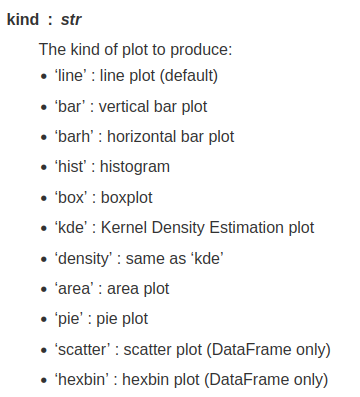

Estos gráficos ayudan a visualizar el comportamiento de los datos.

In [70]:
df_oro

,Ultimo,Apertura,Maximo,Minimo,Vol,Var
Fecha,,,,,,
2023-09-28,1883.55,1895.0,1896.75,1874.55,NaN,-0.39
2023-09-27,1890.90,1918.8,1921.70,1890.30,238.53,-1.51
2023-09-26,1919.80,1935.1,1935.50,1917.20,212.26,-0.87
2023-09-25,1936.60,1944.7,1946.80,1933.80,164.26,-0.46
2023-09-22,1945.60,1939.6,1949.10,1939.60,139.93,0.31
...,...,...,...,...,...,...
2022-10-03,1702.00,1670.5,1710.40,1666.50,215.49,1.79
2022-09-30,1672.00,1669.5,1684.40,1667.50,179.99,0.20
2022-09-29,1668.60,1669.0,1673.10,1649.30,201.96,-0.08


### line()
Para mostrar tendencias en conjuntos de datos numéricos.

<AxesSubplot:xlabel='Fecha'>

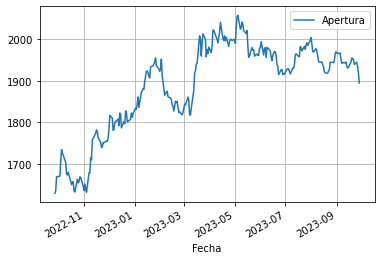

In [71]:
df_oro.plot.line(y="Apertura", grid=True)

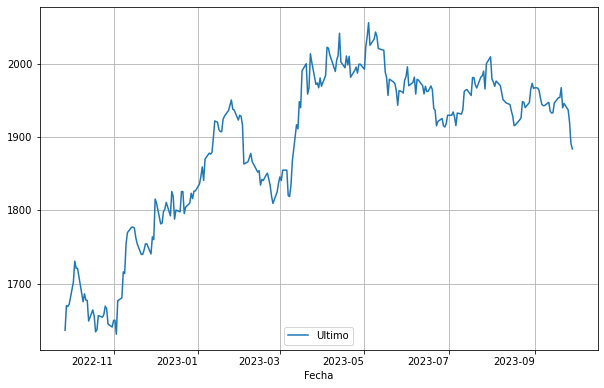

In [75]:
# Line plot usando OOP
fig, ax = plt.subplots(figsize=(10, 7))

df_oro.plot.line(y="Ultimo", ax=ax, rot=0)
ax.grid()
ax.legend(loc="lower center")

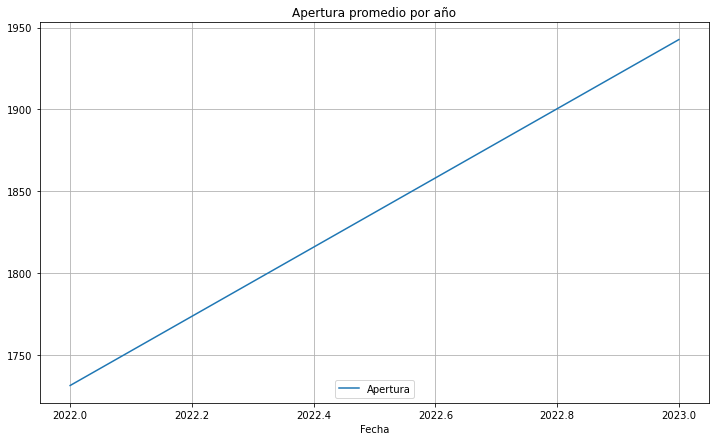

In [82]:
# Line plot con grupos
fig, ax = plt.subplots(figsize=(12, 7))

df_oro.groupby(by=df_oro.index.year).mean().plot(kind="line", y="Apertura", ax=ax)
ax.set_title("Apertura promedio por año")
ax.grid()
ax.legend(loc="lower center")

### bar() 

Los bar plot se utilizan para representar datos de tipo categórico. 

In [84]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [86]:
df_titanic_G1 = df_titanic.groupby("class")
df_titanic_G1.agg({"survived":["count", "sum"]})

survived     
          count  sum
class               
First       216  136
Second      184   87
Third       491  119

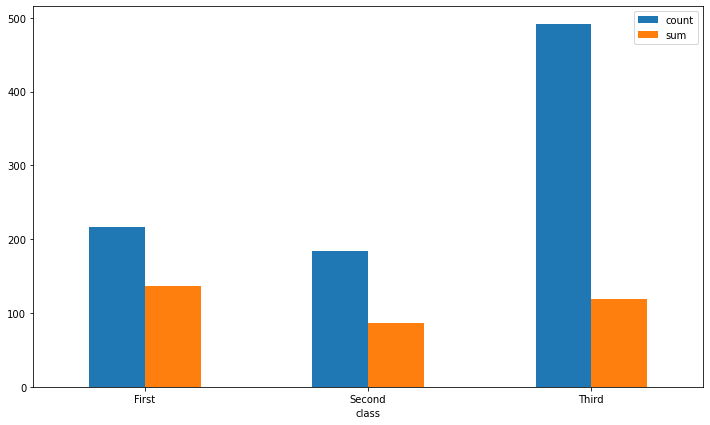

In [88]:
fig, ax = plt.subplots(figsize=(12, 7))
df_titanic_G1["survived"].agg(["count", "sum"]).plot.bar(rot=0, ax=ax)
ax.legend()

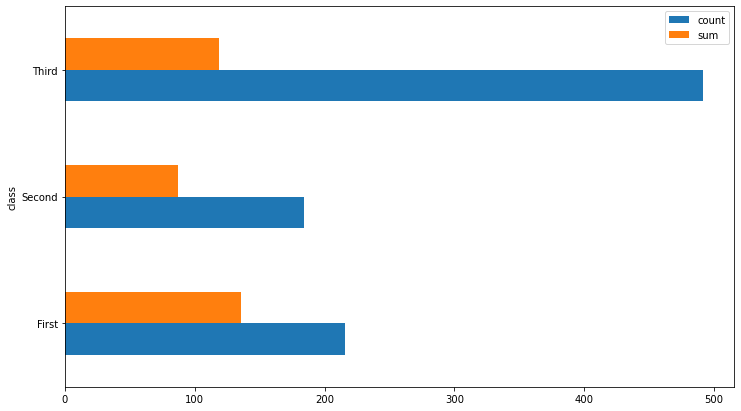

In [89]:
fig, ax = plt.subplots(figsize=(12, 7))
df_titanic_G1["survived"].agg(["count", "sum"]).plot.barh(rot=0, ax=ax)
ax.legend()

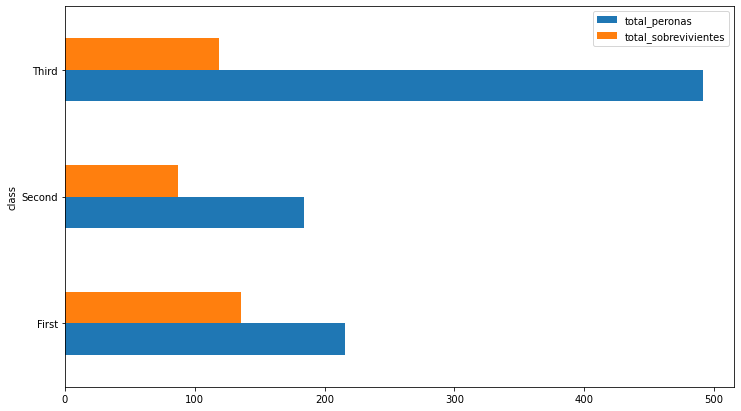

In [90]:
#Cambiar el nombre de las columnas "count" y "sum"
fig, ax = plt.subplots(figsize=(12, 7))

df_titanic_G1["survived"].agg(total_peronas ="count", total_sobrevivientes = "sum").plot.barh(rot=0, ax=ax)
ax.legend()

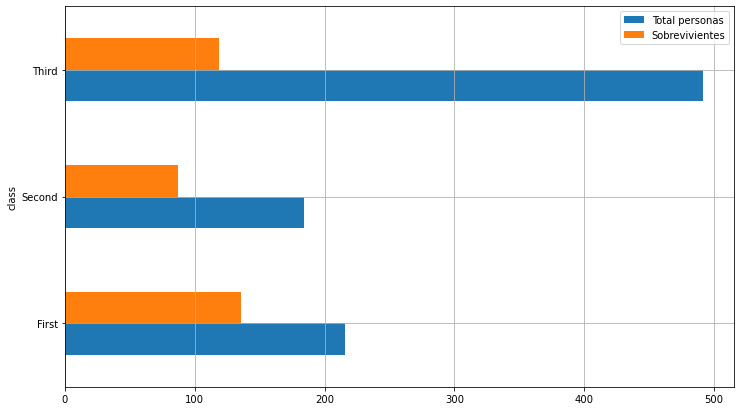

In [91]:
fig, ax = plt.subplots(figsize=(12, 7))

df_titanic_G1["survived"].agg( ("count","sum"))\
                .rename(columns={"count":"Total personas", "sum":"Sobrevivientes"})\
                .plot.barh(rot=0, ax=ax)
ax.legend()
ax.grid()

### hist()

Para representar frecuencias para valores de tipo numérico se utiliza hist(). 

<AxesSubplot:>

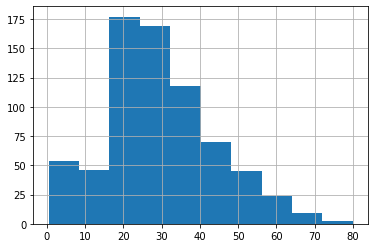

In [80]:
df_titanic.age.hist()

<AxesSubplot:>

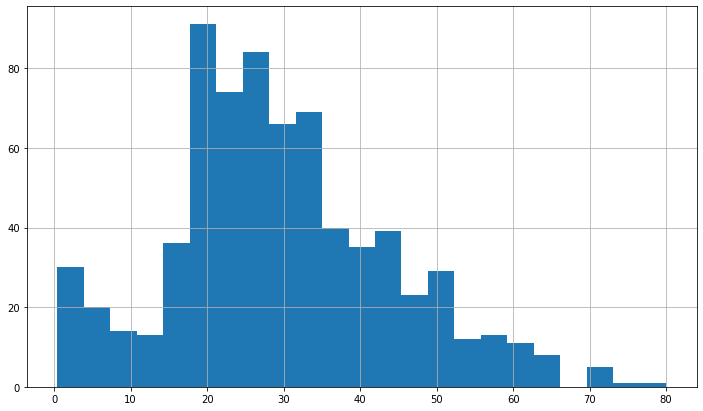

In [92]:
#Cambiando el número de bins
fig, ax = plt.subplots(figsize=(12, 7))

df_titanic.age.hist(bins=int(1+3.322*np.log(df_titanic.age.shape[0])), ax=ax)

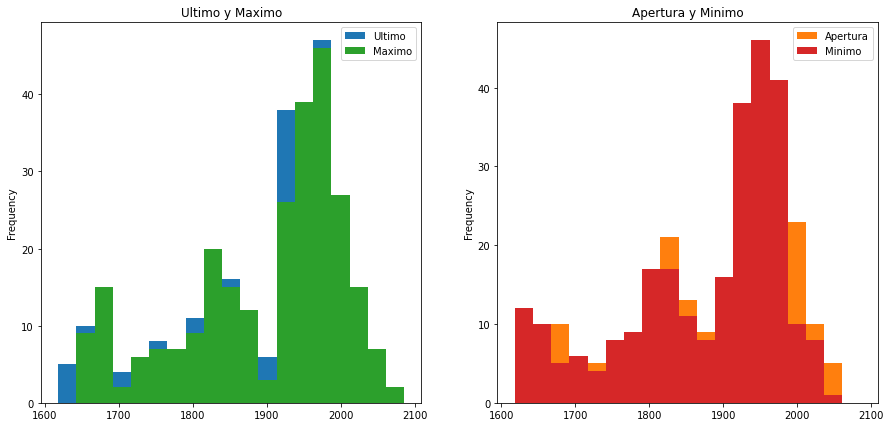

In [95]:
#Cambiando el número de bins
fig, ax = plt.subplots(figsize=(15, 7), ncols=2, nrows=1)

df_oro.loc[:,:"Minimo"]\
                .plot.hist(bins=int(1+3.322*np.log(df_oro.shape[0])),
                           histtype="bar",
                           subplots=[("Ultimo", "Maximo"), ("Apertura", "Minimo")],
                           ax=ax)

ax[0].set_title("Ultimo y Maximo")
ax[1].set_title("Apertura y Minimo")
plt.show()

### boxplot()

Un boxplot utiliza la información de los cuartiles para representar la información numérica de una columna del DataFrame.

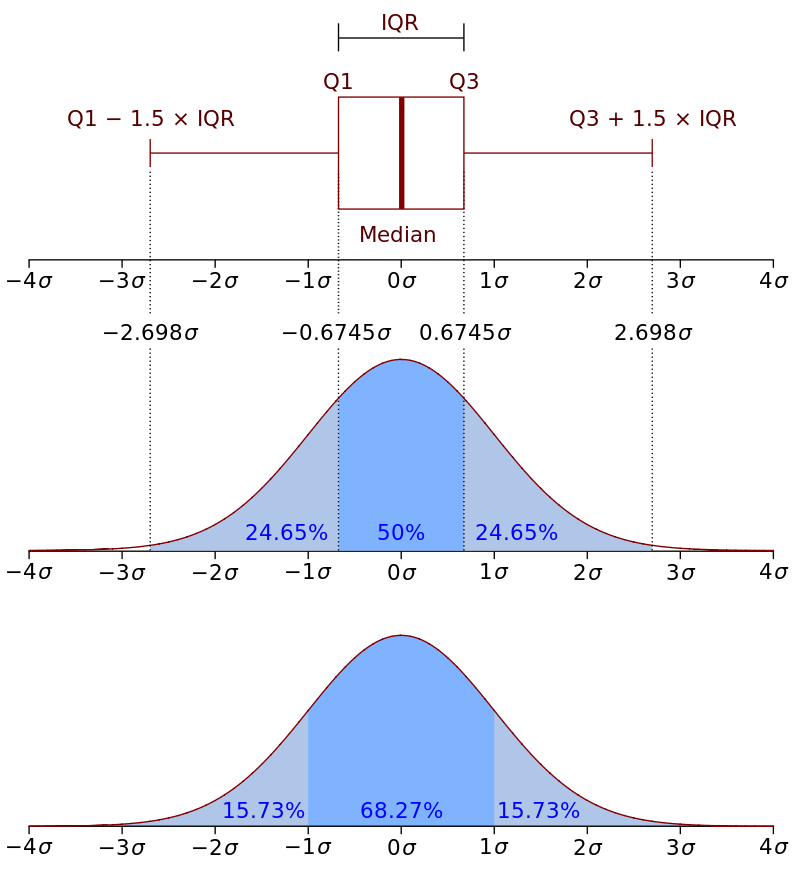

Imagen de wikipedia (https://en.wikipedia.org/wiki/Box_plot).

<AxesSubplot:>

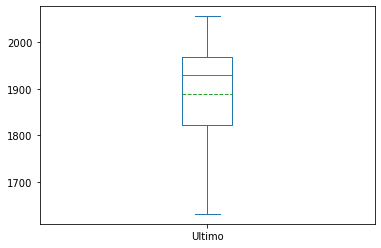

In [111]:
df_oro.Ultimo.plot.box(meanline=True, showmeans=True)

<AxesSubplot:ylabel='Frequency'>

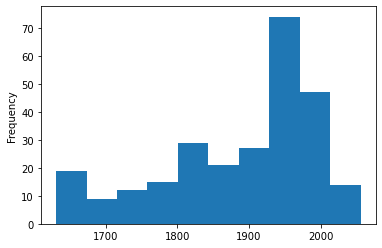

In [97]:
df_oro.Ultimo.plot.hist()

<AxesSubplot:>

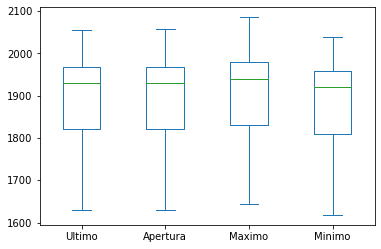

In [99]:
df_oro.loc[:,:"Minimo"].plot.box()

<AxesSubplot:>

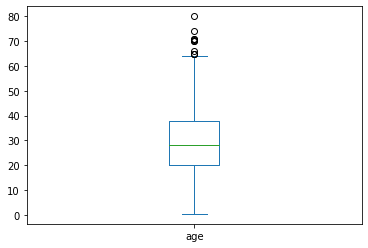

In [100]:
df_titanic.age.plot.box()

<AxesSubplot:>

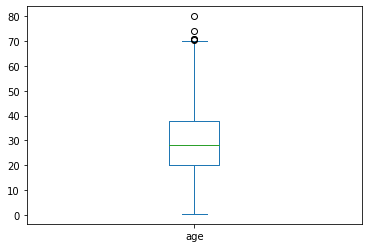

In [109]:
# Cambiar el valor de los bigotes
df_titanic.age.plot.box(whis=1.8)